<a href="https://colab.research.google.com/github/ShaliniAnandaPhD/HarmonyLens/blob/main/Harmony_Lens_Collaboration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- The code allows testing resolution strategies without real-world risks by randomly generating hypothetical scenarios and assessing negotiation outcomes in the run_simulation function. Different strategy effectiveness levels and relationship qualities can be set to explore their impact.

- Insight into influential factors is gained by visualizing inputs like conflict level and outputs like negotiated agreements. Their correlation and variability is quantitatively shown in visualize_simulation_results. This reveals dynamics between relationships, proposals, and outcomes.

- More informed decisions can follow these simulations by analyzing the range of generated scenarios. The effects of enhancing relationships or strategy efficacy is directly seen by comparing across the randomized instances.

- Negotiator behaviors are explored by incorporating random events through event flags and conflict modifications. The simulations can reveal how surprise disruptions alter negotiated outcomes in the model.

- A large batch of scenarios is efficiently created and evaluated, as shown by the 20 instantiations simulated. This allows assessment of general trends rather than case-specific anomalies in what drives successful conflict resolution.

In summary, features like randomized data, adjustable parameters, quantitative analysis, and batch efficiency make this coding framework well-suited to illuminating patterns that can inform more effective negotiation preparation, policies, and training.

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

def generate_enhanced_synthetic_data(num_scenarios):
    scenarios = []
    for _ in range(num_scenarios):
        conflict_level = np.random.normal(5, 2)  # Gaussian distribution
        strategy_effectiveness = np.random.normal(5, 2)
        relationship_level = np.random.normal(5, 2)
        cultural_difference = random.choice([0, 1])  # New variable
        time_pressure = random.randint(1, 5)  # New variable
        random_event = random.choice([0, 1])
        scenarios.append((conflict_level, strategy_effectiveness, relationship_level, cultural_difference, time_pressure, random_event))
    return scenarios



In [3]:
def run_enhanced_simulation(scenarios):
    outcomes = []
    strategy_learning_factor = 0.1
    relationship_adjustment = 0.5

    for conflict, strategy, relationship, cultural_diff, time_press, event in scenarios:
        if cultural_diff:
            strategy -= 1  # Adjust strategy effectiveness based on cultural difference
        if time_press > 3:
            conflict += 1  # Increase conflict level under time pressure

        adjusted_strategy = strategy + (relationship / 10)
        if event:
            conflict += random.randint(-2, 2)

        outcome = adjusted_strategy - conflict
        outcomes.append(outcome)

        # Strategy and relationship learning and adjustment
        strategy += strategy_learning_factor * outcome
        relationship += relationship_adjustment * outcome

    return outcomes




In [4]:
def visualize_enhanced_simulation_results(scenarios, outcomes):
    x = np.arange(len(scenarios))
    width = 0.25

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x - width * 2, [conflict for conflict, _, _, _, _, _ in scenarios], width, label='Conflict Level')
    ax.bar(x - width, [strategy for _, strategy, _, _, _, _ in scenarios], width, label='Strategy Effectiveness')
    ax.bar(x, [relationship for _, _, relationship, _, _, _ in scenarios], width, label='Relationship Level')
    ax.bar(x + width, [cultural for _, _, _, cultural, _, _ in scenarios], width, label='Cultural Difference')
    ax.bar(x + width * 2, [time for _, _, _, _, time, _ in scenarios], width, label='Time Pressure')
    outcome_colors = ['green' if outcome >= 0 else 'red' for outcome in outcomes]
    ax.bar(x + width * 3, outcomes, width, color=outcome_colors, label='Outcome')

    ax.set_xlabel('Scenario Number')
    ax.set_ylabel('Levels and Outcomes')
    ax.set_title('Enhanced Negotiation Scenario Simulation Results')
    ax.set_xticks(x)
    ax.set_xticklabels(range(1, len(scenarios) + 1))
    ax.legend()

    fig.tight_layout()
    plt.show()




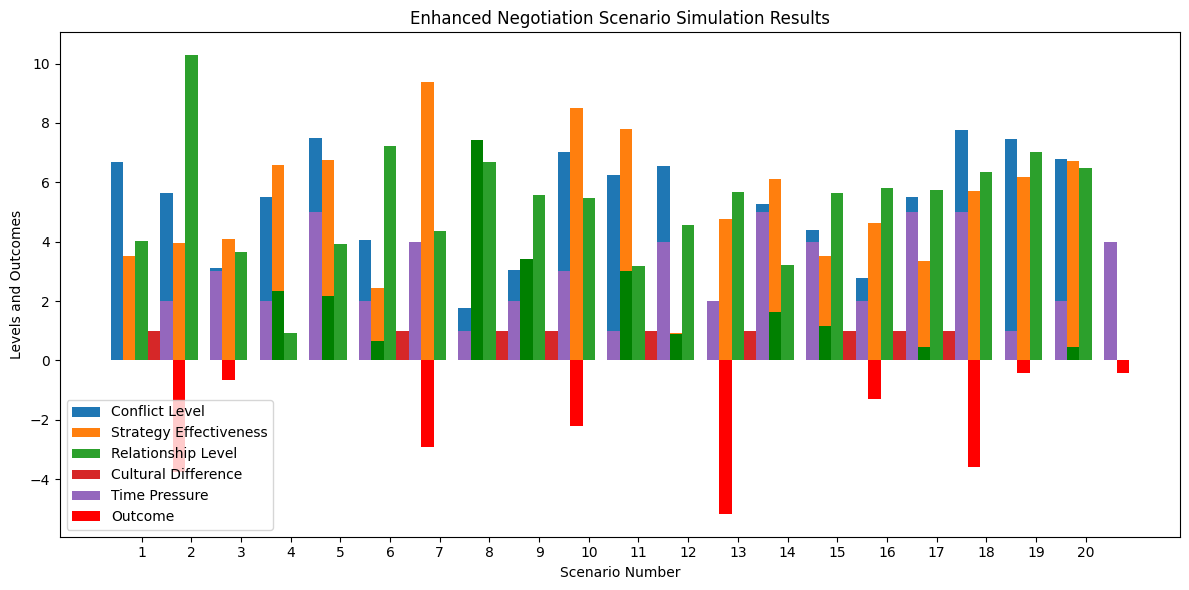

In [6]:
num_scenarios = 20  # Define the number of scenarios

# Use the enhanced function for generating synthetic data
enhanced_synthetic_scenarios = generate_enhanced_synthetic_data(num_scenarios)

# Run the enhanced simulation with the new scenarios
enhanced_simulation_outcomes = run_enhanced_simulation(enhanced_synthetic_scenarios)

# Visualize the results using the enhanced visualization function
visualize_enhanced_simulation_results(enhanced_synthetic_scenarios, enhanced_simulation_outcomes)




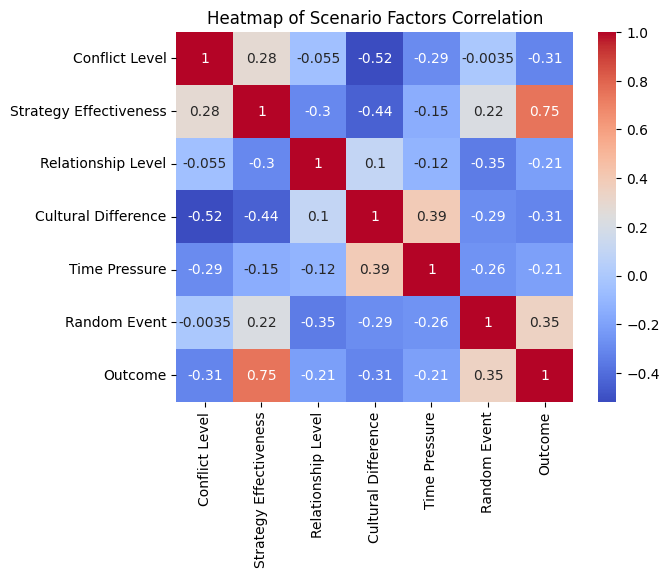

In [7]:
import seaborn as sns
import pandas as pd

def visualize_with_heatmap(scenarios, outcomes):
    df = pd.DataFrame(scenarios, columns=['Conflict Level', 'Strategy Effectiveness', 'Relationship Level', 'Cultural Difference', 'Time Pressure', 'Random Event'])
    df['Outcome'] = outcomes

    # Calculating correlation matrix
    correlation_matrix = df.corr()

    # Plotting heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Heatmap of Scenario Factors Correlation')
    plt.show()

# Example usage
visualize_with_heatmap(enhanced_synthetic_scenarios, enhanced_simulation_outcomes)


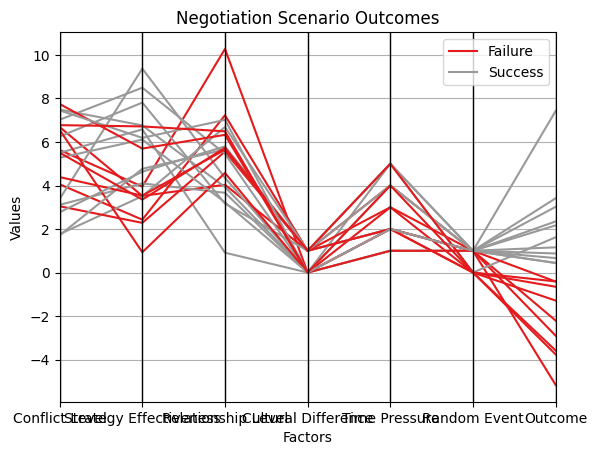

In [8]:
from pandas.plotting import parallel_coordinates

def visualize_with_parallel_coordinates(scenarios, outcomes):
    df = pd.DataFrame(scenarios, columns=['Conflict Level', 'Strategy Effectiveness', 'Relationship Level', 'Cultural Difference', 'Time Pressure', 'Random Event'])
    df['Outcome'] = outcomes
    df['Outcome Category'] = ['Success' if o >= 0 else 'Failure' for o in outcomes]

    parallel_coordinates(df, 'Outcome Category', colormap=plt.get_cmap("Set1"))
    plt.title('Negotiation Scenario Outcomes')
    plt.xlabel('Factors')
    plt.ylabel('Values')
    plt.grid(True)
    plt.show()

visualize_with_parallel_coordinates(enhanced_synthetic_scenarios, enhanced_simulation_outcomes)


In [9]:
import plotly.express as px

def visualize_with_interactive_dashboard(scenarios, outcomes):
    df = pd.DataFrame(scenarios, columns=['Conflict Level', 'Strategy Effectiveness', 'Relationship Level', 'Cultural Difference', 'Time Pressure', 'Random Event'])
    df['Outcome'] = outcomes

    fig = px.scatter(df, x='Strategy Effectiveness', y='Relationship Level', color='Outcome', size='Conflict Level', hover_data=df.columns)
    fig.update_layout(title='Interactive Visualization of Scenario Outcomes')
    fig.show()

# Example usage
visualize_with_interactive_dashboard(enhanced_synthetic_scenarios, enhanced_simulation_outcomes)


AGENT

In [10]:
class Negotiator:
    def __init__(self, strategy_effectiveness, relationship_level, cultural_difference, time_pressure):
        self.strategy_effectiveness = strategy_effectiveness
        self.relationship_level = relationship_level
        self.cultural_difference = cultural_difference
        self.time_pressure = time_pressure
        self.conflict_level = np.random.normal(5, 2)

    def decide(self, event):
        # Decision logic based on the attributes and the event
        if self.cultural_difference:
            self.strategy_effectiveness -= 1
        if self.time_pressure > 3:
            self.conflict_level += 1
        if event:
            self.conflict_level += random.randint(-2, 2)

        # Outcome calculation
        outcome = self.strategy_effectiveness + (self.relationship_level / 10) - self.conflict_level
        return outcome


In [11]:
def generate_agents(num_agents):
    agents = []
    for _ in range(num_agents):
        strategy_effectiveness = np.random.normal(5, 2)
        relationship_level = np.random.normal(5, 2)
        cultural_difference = random.choice([0, 1])
        time_pressure = random.randint(1, 5)
        agent = Negotiator(strategy_effectiveness, relationship_level, cultural_difference, time_pressure)
        agents.append(agent)
    return agents


In [12]:
def run_agent_simulation(agents):
    outcomes = []
    for agent in agents:
        random_event = random.choice([0, 1])
        outcome = agent.decide(random_event)
        outcomes.append(outcome)
    return outcomes


In [13]:
!pip install seaborn plotly


In [14]:
import pandas as pd

def convert_agent_data_for_visualization(agents, outcomes):
    # Extracting data from agents and combining it with outcomes
    data = {
        "Strategy Effectiveness": [agent.strategy_effectiveness for agent in agents],
        "Relationship Level": [agent.relationship_level for agent in agents],
        "Cultural Difference": [agent.cultural_difference for agent in agents],
        "Time Pressure": [agent.time_pressure for agent in agents],
        "Conflict Level": [agent.conflict_level for agent in agents],
        "Outcome": outcomes
    }
    df = pd.DataFrame(data)
    return df


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_with_heatmap(df):
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Heatmap of Scenario Factors Correlation')
    plt.show()


In [16]:
from pandas.plotting import parallel_coordinates

def visualize_with_parallel_coordinates(df):
    df['Outcome Category'] = ['Success' if o >= 0 else 'Failure' for o in df['Outcome']]
    parallel_coordinates(df, 'Outcome Category', colormap=plt.get_cmap("Set1"))
    plt.title('Negotiation Scenario Outcomes')
    plt.xlabel('Factors')
    plt.ylabel('Values')
    plt.grid(True)
    plt.show()


In [19]:
import plotly.express as px

def visualize_with_interactive_dashboard(df):
    # Ensure all size values are positive
    df['Positive Outcome'] = df['Outcome'].apply(lambda x: abs(x))  # Using absolute values

    fig = px.scatter(df, x='Strategy Effectiveness', y='Relationship Level',
                     color='Outcome', size='Positive Outcome',
                     hover_data=df.columns)
    fig.update_layout(title='Interactive Visualization of Scenario Outcomes')
    fig.show()



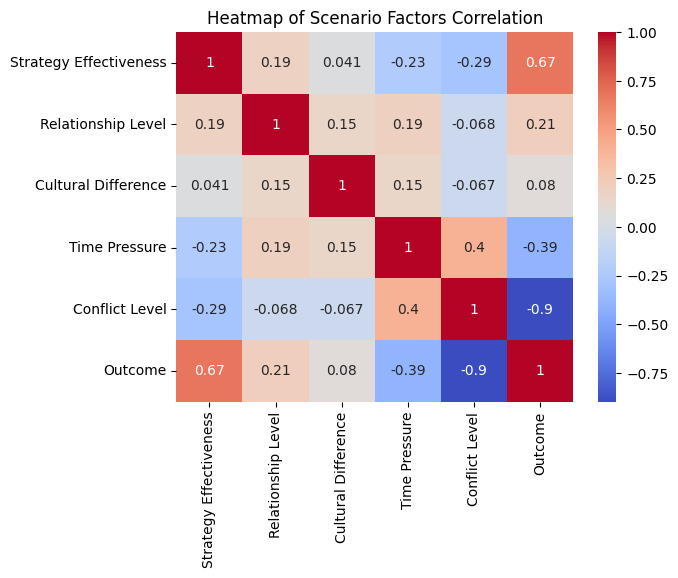

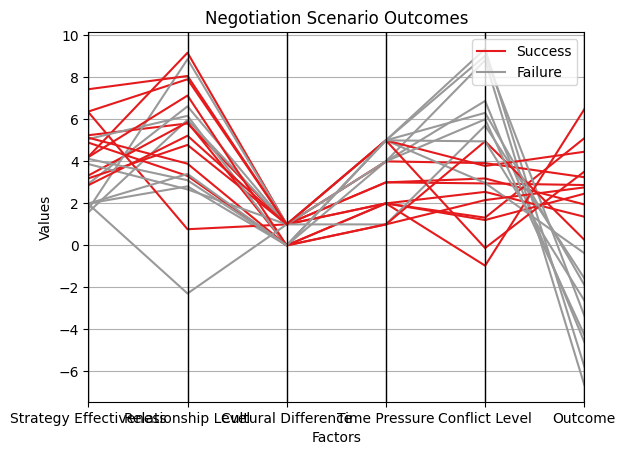

In [20]:
num_agents = 20
agents = generate_agents(num_agents)
simulation_outcomes = run_agent_simulation(agents)

agent_data_df = convert_agent_data_for_visualization(agents, simulation_outcomes)

visualize_with_heatmap(agent_data_df)
visualize_with_parallel_coordinates(agent_data_df)
visualize_with_interactive_dashboard(agent_data_df)



AGENTS FOR RESOLVING CONFLICTS

In [26]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import plotly.express as px


In [27]:
class Negotiator:
    def __init__(self, id, strategy_effectiveness, relationship_level, cultural_difference, time_pressure):
        self.id = id
        self.strategy_effectiveness = strategy_effectiveness
        self.relationship_level = relationship_level
        self.cultural_difference = cultural_difference
        self.time_pressure = time_pressure
        self.conflict_level = np.random.normal(5, 2)
        self.learning_rate = 0.1  # Rate at which the agent adapts its strategy

    def negotiate(self, other_agent):
        if self.relationship_level > other_agent.relationship_level:
            self.strategy_effectiveness += self.learning_rate
        else:
            self.strategy_effectiveness -= self.learning_rate

        outcome = self.strategy_effectiveness - other_agent.strategy_effectiveness
        return outcome

    def update_after_negotiation(self, outcome):
        self.relationship_level += outcome * self.learning_rate


In [31]:
# Function to Generate Agents
def generate_agents(num_agents):
    agents = []
    for i in range(num_agents):
        strategy_effectiveness = np.random.normal(5, 2)
        relationship_level = np.random.normal(5, 2)
        cultural_difference = random.choice([0, 1])
        time_pressure = random.randint(1, 5)
        agent = Negotiator(i, strategy_effectiveness, relationship_level, cultural_difference, time_pressure)
        agents.append(agent)
    return agents


In [32]:
# Function to Run the Simulation
def run_agent_simulation(agents):
    outcomes = []
    for agent in agents:
        other_agent = random.choice([a for a in agents if a.id != agent.id])
        outcome = agent.negotiate(other_agent)
        outcomes.append(outcome)
        agent.update_after_negotiation(outcome)
        other_agent.update_after_negotiation(-outcome)
    return outcomes


In [33]:
# Data Preparation for Visualization
import pandas as pd

def convert_agent_data_for_visualization(agents, outcomes):
    data = {
        "Agent ID": [agent.id for agent in agents],
        "Strategy Effectiveness": [agent.strategy_effectiveness for agent in agents],
        "Relationship Level": [agent.relationship_level for agent in agents],
        "Cultural Difference": [agent.cultural_difference for agent in agents],
        "Time Pressure": [agent.time_pressure for agent in agents],
        "Conflict Level": [agent.conflict_level for agent in agents],
        "Outcome": outcomes
    }
    df = pd.DataFrame(data)
    return df


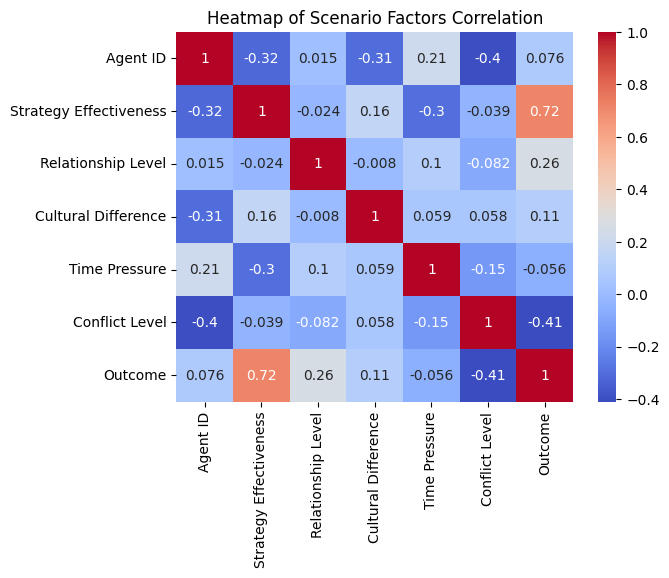

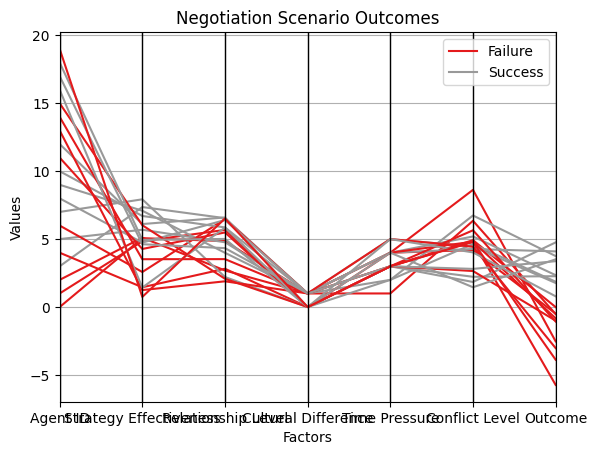

In [34]:
# : Main Execution
num_agents = 20
agents = generate_agents(num_agents)
simulation_outcomes = run_agent_simulation(agents)

agent_data_df = convert_agent_data_for_visualization(agents, simulation_outcomes)

# Assuming visualization functions are defined in another cell or imported
visualize_with_heatmap(agent_data_df)
visualize_with_parallel_coordinates(agent_data_df)
visualize_with_interactive_dashboard(agent_data_df)


In [41]:
# Import necessary libraries
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import seaborn as sns



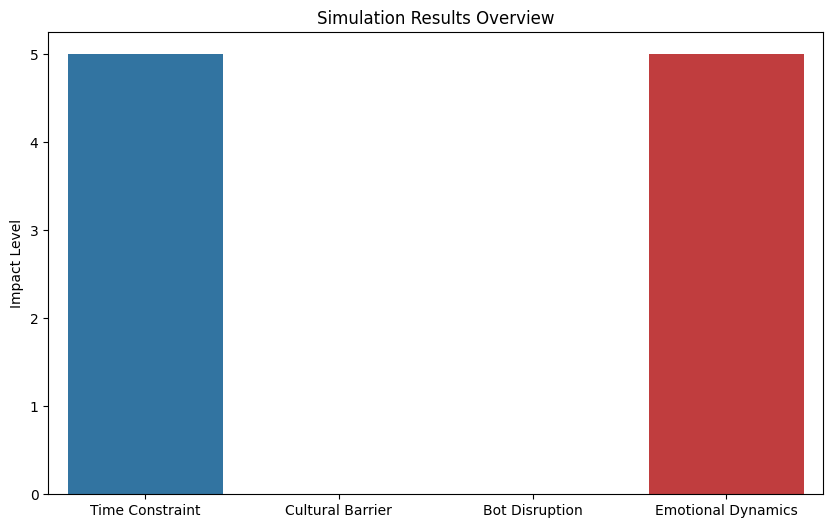

Simulation Summary:
- Time Constraint Level: 5
- Cultural Barrier Level: 0
- Bot Disruption: Disabled
- Emotional Dynamics Level: 5


In [48]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import seaborn as sns

# Enhanced widgets for user input
time_constraint_slider = widgets.IntSlider(value=5, min=1, max=10, step=1, description='Time Constraint:', style={'description_width': 'initial'})
cultural_barrier_dropdown = widgets.Dropdown(options=[('None', 0), ('Low', 1), ('Medium', 2), ('High', 3)], description='Cultural Barrier:', style={'description_width': 'initial'})
bot_disruption_checkbox = widgets.Checkbox(value=False, description='Include Bot Disruption', indent=False)
emotional_dynamics_slider = widgets.IntSlider(value=5, min=1, max=10, step=1, description='Emotional Dynamics:', style={'description_width': 'initial'})
run_simulation_button = widgets.Button(description='Run Simulation', button_style='success', tooltip='Click to run the simulation')

# Layout for the widgets
widgets_layout = widgets.Layout(display='flex', flex_flow='column', align_items='stretch', width='100%')
widgets_container = widgets.VBox([time_constraint_slider, cultural_barrier_dropdown, bot_disruption_checkbox, emotional_dynamics_slider, run_simulation_button], layout=widgets_layout)
display(widgets_container)





WIDGETS AND AGENTS # New Section

In [50]:
# Import Libraries and Define Agent Class
import numpy as np
import random
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

class NegotiationAgent:
    def __init__(self, strategy_level, relationship_level):
        self.strategy_level = strategy_level
        self.relationship_level = relationship_level

    def negotiate(self, other_agent):
        # Simple negotiation logic based on strategy and relationship levels
        if self.strategy_level > other_agent.strategy_level:
            return 'win'
        elif self.strategy_level < other_agent.strategy_level:
            return 'lose'
        else:
            return 'draw'


In [51]:
#  Define Widgets for User Interaction
agent1_strategy_slider = widgets.IntSlider(min=1, max=10, description='Agent 1 Strategy:')
agent1_relationship_slider = widgets.IntSlider(min=1, max=10, description='Agent 1 Relationship:')
agent2_strategy_slider = widgets.IntSlider(min=1, max=10, description='Agent 2 Strategy:')
agent2_relationship_slider = widgets.IntSlider(min=1, max=10, description='Agent 2 Relationship:')
simulate_button = widgets.Button(description='Simulate Negotiation')

widgets.VBox([
    widgets.HBox([agent1_strategy_slider, agent1_relationship_slider]),
    widgets.HBox([agent2_strategy_slider, agent2_relationship_slider]),
    simulate_button
])


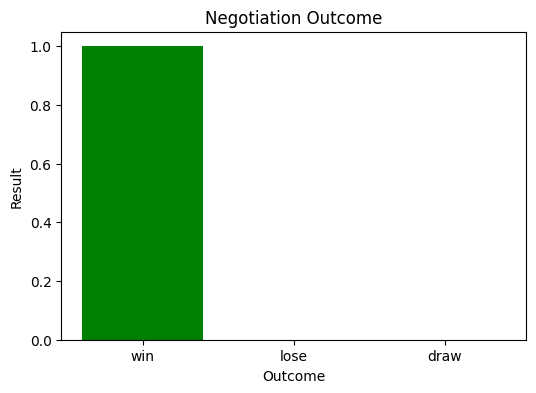

In [52]:
# Define Simulation Function and Visualization
def simulate(b):
    clear_output(wait=True)
    display(widgets_container)

    agent1 = NegotiationAgent(agent1_strategy_slider.value, agent1_relationship_slider.value)
    agent2 = NegotiationAgent(agent2_strategy_slider.value, agent2_relationship_slider.value)

    outcome = agent1.negotiate(agent2)

    # Visualization of results
    plt.figure(figsize=(6, 4))
    outcomes = ['win', 'lose', 'draw']
    results = [outcome == 'win', outcome == 'lose', outcome == 'draw']
    plt.bar(outcomes, results, color=['green', 'red', 'blue'])
    plt.title('Negotiation Outcome')
    plt.xlabel('Outcome')
    plt.ylabel('Result')
    plt.show()

simulate_button.on_click(simulate)

# For displaying the widgets again
widgets_container = widgets.VBox([
    widgets.HBox([agent1_strategy_slider, agent1_relationship_slider]),
    widgets.HBox([agent2_strategy_slider, agent2_relationship_slider]),
    simulate_button
])
display(widgets_container)


# AGENTS

In [53]:
# Import Libraries and Define the Agent Class
import numpy as np
import random

class Negotiator:
    def __init__(self, id, strategy_effectiveness, relationship_level, cultural_difference, time_pressure):
        self.id = id
        self.strategy_effectiveness = strategy_effectiveness
        self.relationship_level = relationship_level
        self.cultural_difference = cultural_difference
        self.time_pressure = time_pressure
        self.conflict_level = np.random.normal(5, 2)
        self.learning_rate = 0.1  # Learning rate for strategy updates

    def negotiate(self, other_agent):
        # Adjust strategy effectiveness based on relationship level
        if self.relationship_level > other_agent.relationship_level:
            self.strategy_effectiveness += self.learning_rate
        else:
            self.strategy_effectiveness -= self.learning_rate

        # Calculate outcome based on strategy effectiveness
        outcome = self.strategy_effectiveness - other_agent.strategy_effectiveness
        return outcome

    def update_after_negotiation(self, outcome):
        # Update relationship level based on negotiation outcome
        self.relationship_level += outcome * self.learning_rate


In [54]:
#  Generate Agents Function
def generate_agents(num_agents):
    agents = []
    for i in range(num_agents):
        strategy_effectiveness = np.random.normal(5, 2)
        relationship_level = np.random.normal(5, 2)
        cultural_difference = random.choice([0, 1])
        time_pressure = random.randint(1, 5)
        agents.append(Negotiator(i, strategy_effectiveness, relationship_level, cultural_difference, time_pressure))
    return agents


In [55]:
# Simulation Function
def run_agent_simulation(agents):
    outcomes = []
    for agent in agents:
        other_agent = random.choice([a for a in agents if a.id != agent.id])
        outcome = agent.negotiate(other_agent)
        outcomes.append(outcome)
        agent.update_after_negotiation(outcome)
        other_agent.update_after_negotiation(-outcome)
    return outcomes


In [56]:
# Data Preparation for Visualization
import pandas as pd

def convert_agent_data_for_visualization(agents, outcomes):
    data = {
        "Agent ID": [agent.id for agent in agents],
        "Strategy Effectiveness": [agent.strategy_effectiveness for agent in agents],
        "Relationship Level": [agent.relationship_level for agent in agents],
        "Cultural Difference": [agent.cultural_difference for agent in agents],
        "Time Pressure": [agent.time_pressure for agent in agents],
        "Conflict Level": [agent.conflict_level for agent in agents],
        "Negotiation Outcome": outcomes
    }
    return pd.DataFrame(data)


In [57]:
# Visualization Functions
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_with_heatmap(df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap of Agent Attributes')
    plt.show()

def visualize_simulation_results(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x="Strategy Effectiveness", y="Relationship Level", hue="Negotiation Outcome", size="Conflict Level", style="Cultural Difference")
    plt.title('Negotiation Outcomes Scatter Plot')
    plt.show()


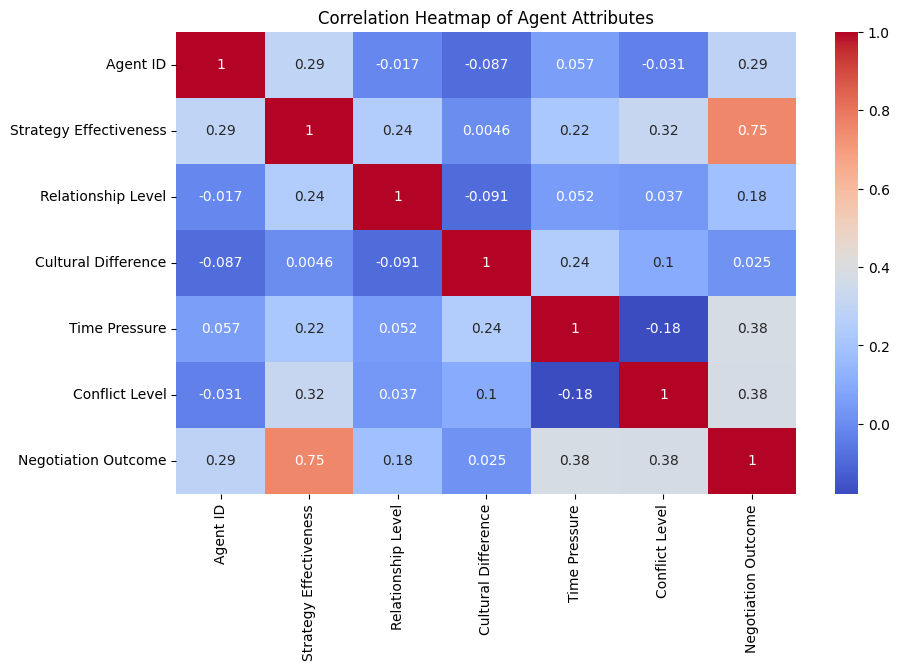

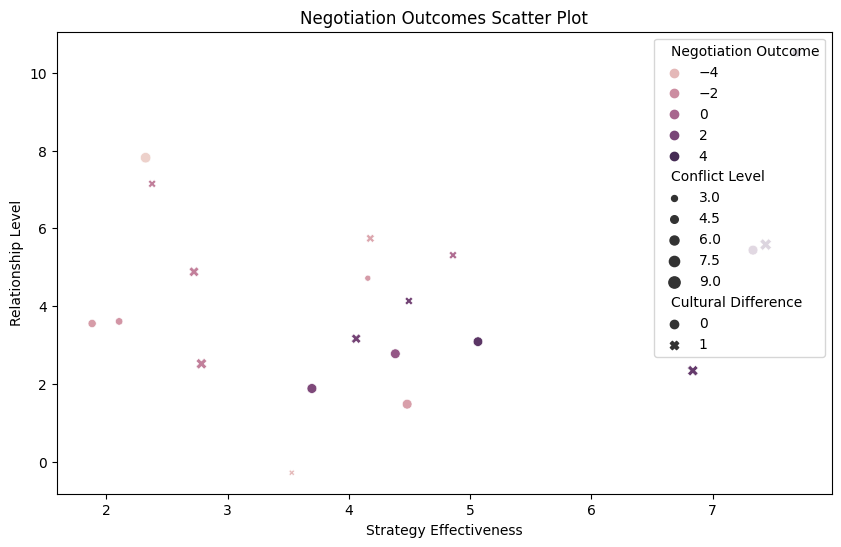

In [58]:
# Main Execution
num_agents = 20
agents = generate_agents(num_agents)
simulation_outcomes = run_agent_simulation(agents)
agent_data_df = convert_agent_data_for_visualization(agents, simulation_outcomes)

# Visualizing the simulation results
visualize_with_heatmap(agent_data_df)
visualize_simulation_results(agent_data_df)


In [59]:
def plot_learning_curves(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history['average_strategy_effectiveness'], label='Average Strategy Effectiveness')
    plt.plot(history['average_relationship_level'], label='Average Relationship Level')
    plt.xlabel('Iterations')
    plt.ylabel('Average Value')
    plt.title('Learning Curves Over Time')
    plt.legend()
    plt.show()


In [60]:
def plot_strategy_vs_outcome(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Strategy Effectiveness', y='Negotiation Outcome')
    plt.title('Strategy vs Outcome Scatterplot')
    plt.show()


In [62]:
def plot_win_rate_histograms(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Win Rate'], kde=True)
    plt.title('Win Rate Histogram')
    plt.xlabel('Win Rate')
    plt.ylabel('Frequency')
    plt.show()



In [63]:
def plot_attribute_correlation_heatmap(df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title('Heatmap of Attribute Correlations')
    plt.show()

In [64]:
from sklearn.manifold import TSNE

def plot_cluster_analysis(df):
    tsne = TSNE(n_components=2, random_state=0)
    tsne_results = tsne.fit_transform(df[['Strategy Effectiveness', 'Relationship Level', 'Negotiation Outcome']])

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], hue=df['Negotiation Outcome'])
    plt.title('Cluster Analysis of Agents')
    plt.xlabel('TSNE Component 1')
    plt.ylabel('TSNE Component 2')
    plt.show()


In [67]:
# Mock data for simulation history
import pandas as pd
import numpy as np

# Example data generation for simulation history
iteration_count = 50
simulation_history = {
    'average_strategy_effectiveness': np.random.rand(iteration_count).cumsum(),
    'average_relationship_level': np.random.rand(iteration_count).cumsum()
}
simulation_history = pd.DataFrame(simulation_history)

In [68]:
# Mock data for agent data
agent_count = 20
agent_data = {
    'Strategy Effectiveness': np.random.rand(agent_count) * 10,
    'Relationship Level': np.random.rand(agent_count) * 10,
    'Negotiation Outcome': np.random.choice(['win', 'lose', 'draw'], agent_count),
    'Win Rate': np.random.rand(agent_count),
    'Cultural Difference': np.random.choice([0, 1], agent_count),
    'Time Pressure': np.random.randint(1, 5, agent_count),
    'Conflict Level': np.random.normal(5, 2, agent_count)
}
agent_data_df = pd.DataFrame(agent_data)


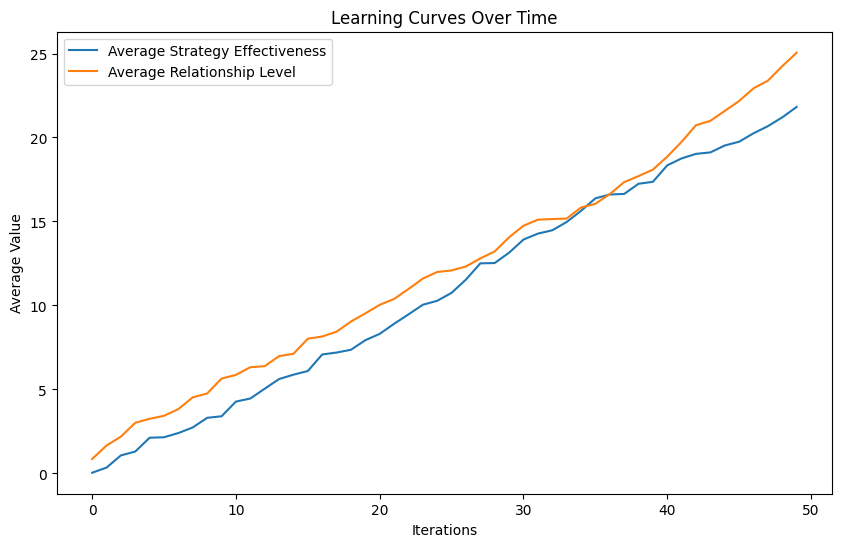

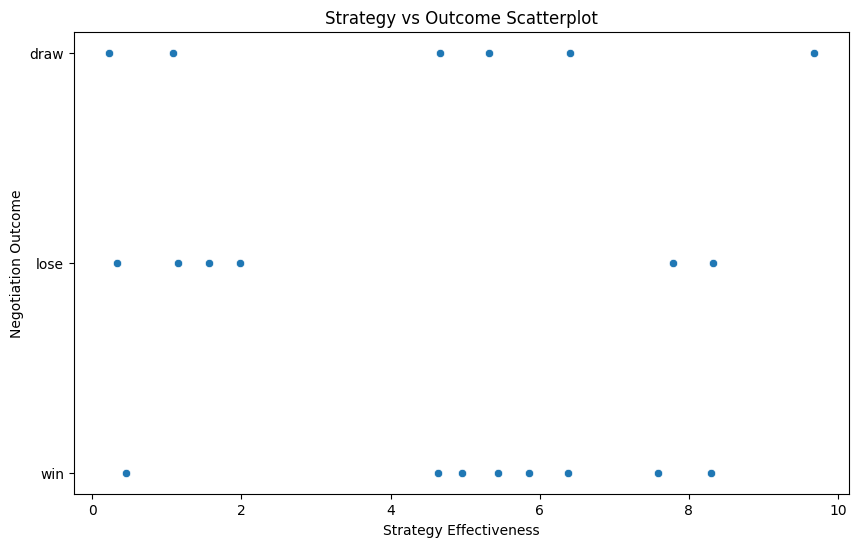

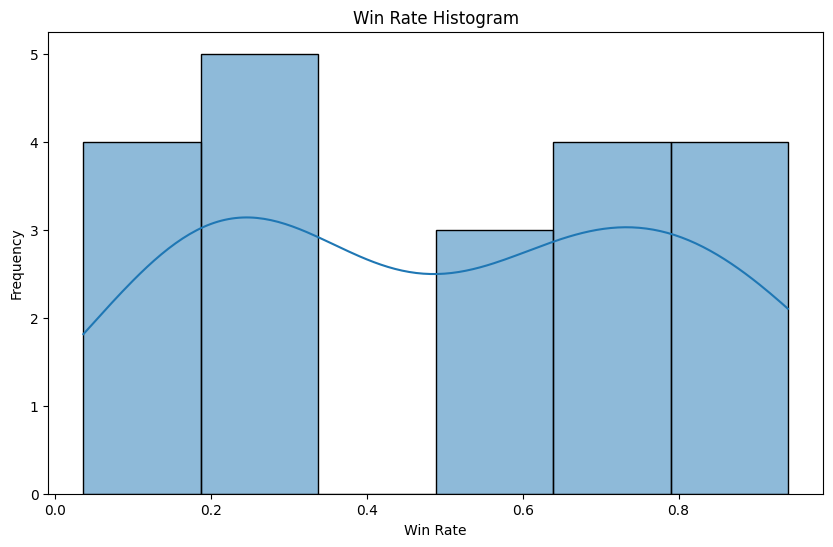

<ipython-input-63-95f3c6eeb300>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



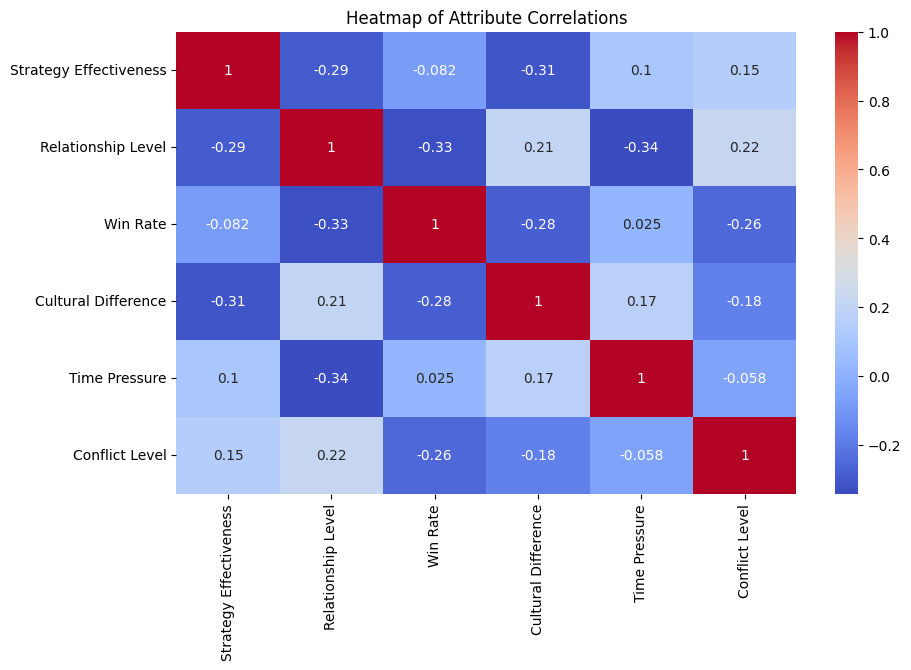

In [69]:
# Main Execution for Visualization with Mock Data
plot_learning_curves(simulation_history)
plot_strategy_vs_outcome(agent_data_df)
plot_win_rate_histograms(agent_data_df)
plot_attribute_correlation_heatmap(agent_data_df)
# plot_cluster_analysis(agent_data_df)  # Uncomment when
